In [2]:
import numpy as np
import os

extracted_dir = 'Z:\Active\Lizzie\FLP_data\ltFLiPAKAREEGEMG0011\ltFLiPAKAREEGEMG0011_extracted_data'
fileP_location = os.path.join(extracted_dir, 'model_prediction_Acq*_hr0.npy')
fileC_location = os.path.join(extracted_dir, 'StatesAcq*_hr0.npy')


In [3]:
import glob
PredictedFiles = glob.glob(fileP_location)
PredictedFiles.sort()
CorrectedFiles = glob.glob(fileC_location)
CorrectedFiles.sort()

print(PredictedFiles)
print(" ")
print(CorrectedFiles)


['Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq10_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq11_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq12_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq13_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq6_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq7_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq8_hr0.npy', 'Z:\\Active\\Lizzie\\FLP_data\\ltFLiPAKAREEGEMG0011\\ltFLiPAKAREEGEMG0011_extracted_data\\model_prediction_Acq9_hr0.npy']
 
['Z:\\Active\\Liz

In [4]:
percent_right = []
acq_num = []
zip_files = zip(PredictedFiles, CorrectedFiles)
for p, c in zip_files:
    predicted_bin = np.load(p)
    corrected_bin = np.load(c)
    position1= p.index('Acq') # gets position of the Acq in the filename
    position2= p.index('_hr')
    name = p[position1+3:position2]
    acq_num.append(name)

    
    num = predicted_bin.size
    numC = 0
    for i in range(num):
        if (predicted_bin[i] != corrected_bin[i]):
            numC = numC + 1
            i = i + 1
    percent_corrected = numC / num
    right = 1-percent_corrected
    percent_right.append(right)
    
print(percent_right)
print(acq_num)

[0.8266666666666667, 0.8266666666666667, 0.8966666666666667, 0.7622222222222222, 0.8177777777777777, 0.9122222222222223, 0.9288888888888889, 0.9611111111111111]
['10', '11', '12', '13', '6', '7', '8', '9']


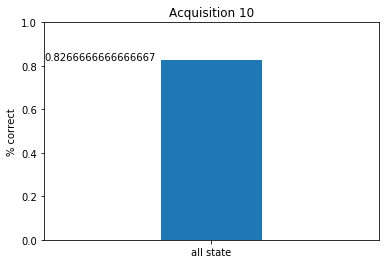

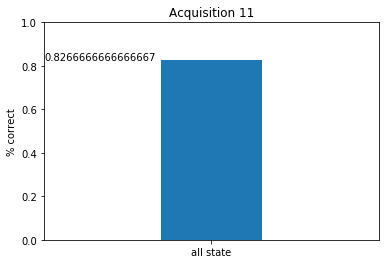

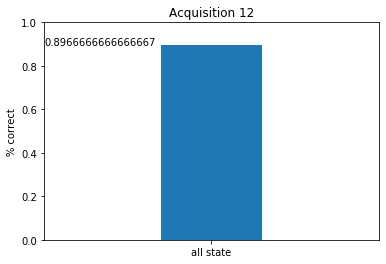

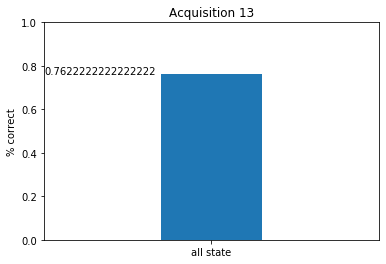

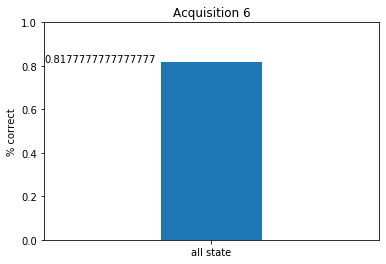

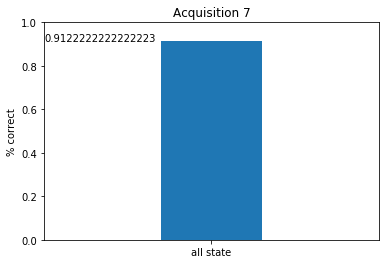

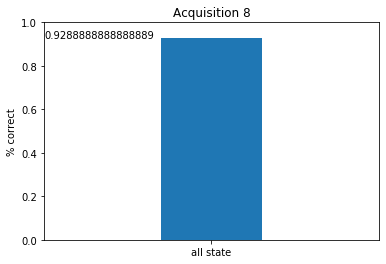

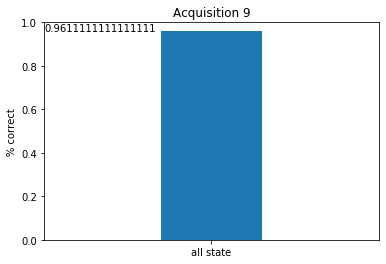

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for k in range(len(percent_right)):
    x=["all state"]
    y = percent_right[k]
    width = 0.3
    
    fig, ax = plt.subplots()
    ax.set_ylabel('% correct')
    ax.set_title('Acquisition ' + acq_num[k])
    plt.text(-0.5, y, y)
    ax.bar(x, y, width)
    ax.set_xlim([-0.5,0.5])
    ax.set_ylim([0,1])
    plt.show()
    
    k = k+1

    #so far we've calculated the correct rate for each acquisision


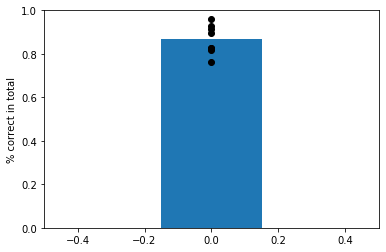

In [64]:
#try to get a single graph showing the accuracy of eah acquisition
import matplotlib.pyplot as plt
total = 0
num_acq = len(percent_right)
for i in range(num_acq):
    total = total + percent_right[i]
    i = i+1
    
ave = total/num_acq

x_range = [0]*num_acq

plt.bar(0, ave, width,  zorder=0)
plt.ylabel("% correct in total")
plt.xlim([-0.5,0.5])
plt.ylim([0,1])

plt.scatter(x_range,percent_right,c='black',zorder=10)

plt.show()




